# A First Taste of Applied Machine Learning - Part 2

**Notice: This notebook is a modification of [go.ipynb and class.ipynb](https://mlbook.explained.ai/notebooks/index.html) by Terence Parr and Jeremy Howard. It is being used by permission of the author.**

Please use this notebook to follow along with the lectures this week. Feel free to play around with any of the settings. 

## Creating a model

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [4]:
rent = pd.read_csv('rent-ideal.csv')
df = rent.head()
df

,bedrooms,bathrooms,latitude,longitude,price
0,1,1.0,40.7108,-73.9539,2400
1,2,1.0,40.7513,-73.9722,3800
2,2,1.0,40.7575,-73.9625,3495
3,3,1.5,40.7145,-73.9425,3000
4,0,1.0,40.7439,-73.9743,2795


In [6]:
X = rent[['bedrooms','bathrooms','latitude','longitude']]
y = rent['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor(n_estimators=10) 

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

## Evaluate the model

In [7]:
predictions = rf.predict(X_train)

e = mean_absolute_error(y_train, predictions)

ep = e*100 / y.mean()

print(f"${e:.0f} average error; {ep:.2f}% error")

$191 average error; 5.54% error


In [8]:
validation_predictions = rf.predict(X_test)

validation_e = mean_absolute_error(y_test, validation_predictions)

validation_ep = validation_e * 100 / y.mean() 

print(f"${validation_e:.0f} average error; {validation_ep:.2f}% error")

$303 average error; 8.81% error


## Hyper-parameters

In [13]:
oob_scores = []
for i in range(50, 101):
    rf = RandomForestRegressor (n_estimators=i, oob_score=True, random_state=16)
    rf.fit(X,y)
    err = rf.oob_score_
    oob_scores.append(err)

In [10]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(range(50,101), oob_scores)

In [9]:
rf_100 = RandomForestRegressor(n_estimators=100) 

rf_100.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
validation_predictions_100 = rf_100.predict(X_test)

validation_e_100 = mean_absolute_error(y_test, validation_predictions_100)

validation_ep_100 = validation_e_100 * 100 / y.mean() 

print(f"${validation_e_100:.0f} average error; {validation_ep_100:.2f}% error")

## Feature importances

In [14]:
!pip install rfpimp

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10649 sha256=7aaabd4465cc6b26a33ed9b887f03524f8a71219238b18fd3046e123654f11fd
  Stored in directory: c:\users\danielle\appdata\local\pip\cache\wheels\d9\f2\53\6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


### Two approaches
- split the data into training and validation data

#### Drop the feature
- include all features anda calculate baseline $R^2$
- for each column
    - drop the columns
    - retrain
    - recalculate $R^2$
    - calculate diference: baseline $R^2$ - new $R^2$
    
#### Permute the feature
- include all features anda calculate baseline $R^2$
- for each column
    - permute the values
    - calculate $R^2$ with permuted values
    - calculate difference: baseline $R^2$ - permuted $R^2$

In [15]:
#Permute

from rfpimp import *

I = importances(rf_100, X_test, y_test)

I

,Importance
Feature,
longitude,0.530423
bedrooms,0.521531
latitude,0.450306
bathrooms,0.442417


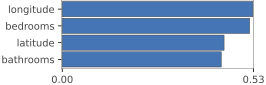

In [16]:
plot_importances(I, color='#4575b4') 

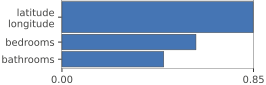

In [17]:
I = importances(rf, X_test, y_test,
                features=['bedrooms','bathrooms',['latitude','longitude']])

plot_importances(I, color='#4575b4') 

## Classification

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer.keys()

In [ ]:
X = cancer['data']
y = cancer['target']

df = pd.DataFrame(X, columns=cancer.feature_names)

df.head().T

In [ ]:
features = ['radius error', 'texture error', 'concave points error',
            'symmetry error', 'worst texture', 'worst smoothness',
            'worst symmetry']

df = df[features] 
df.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cl = RandomForestClassifier(n_estimators=100)
cl.fit(X_train, y_train)

validation_predictions = cl.predict(X_test)

validation_e = accuracy_score(y_test, validation_predictions)

print(f"{validation_e*100:.2f}% correct")

In [ ]:
I = importances(cl, X_test, y_test)
plot_importances(I, color='#4575b4')

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, validation_predictions)